## Часть 1. 
### Воспроизведение алгоритма описанного в статье Elham Moeinaddini от 22 сентября 2018

***Keywords:** Optimal block selection · Distinct discrete firefly algorithm · Entropy · Robustness · Transparency*

***Ключевые слова:** Оптимизация выбора блоков · Дискретный светлячковый алгоритм · Энтропия · Устойчивость · Незаметность*

### 1 Introduction

Решается задача оптимизация показателей незаметности и устойчивости алгоритма. Они зависят от текстуры изображения. При размытой структуре картинки увеличивается устойчивость но изображение становится заметным. При погружении картинки в четкое изображение незаметность повышается но ухудшается устойчивость к атакам. Текстура изображения описывается параметрами: дисперсия, энтропия и страндартное отклонение. Используя эти параметры для погружения изображения можно  улучшить лишь один из показателей но нельзя решить задачу их оптимизации

Поскольку ставится задача - оптимальный выбор блоков изображения для погружения ЦВЗ с оптимальными парметрами незаметности и устойчивости, то одним из  способов её решения может быть применение метаэвристики. За последнее время учеными были успешно применены различные подходы на основе популяционных и роевых алгоритмов

В этой статье предложена новая схема оптимального выбора блоков с применением комбинации энтропии и алгоритма светлячков. Поскольку номера блоков являются различными и дискретными значениями, алгоритм светлячков должен быть модифицирован для генерации различных и дискретных значений. DDFA — это улучшенная версия алгоритма светлячков, которая предлагается в этой статье для генерации таких значений.

Другим фактором, который может повысить эффективность схемы погружения ЦВЗ, является выбор подходящего домена преобразования. Аналитические и имитационные методы показывают, что преобразование Адамара обеспечивает хорошую прозрачность, при этом устойчиво к большинству атак и процессов. В процессе внедрения предлагаемой схемы после выбора правильных блоков биты водяного знака внедряются в коэффициенты Адамара с использованием средних соседних коэффициентов, а **местоположение выбранных блоков сохраняется как секретный ключ для извлечения**.

Преобразование Адамара как частотная область и комбинация энтропии и DDFA для выбора блоков улучшают и балансируют прозрачность и надежность водяного знака. Предлагаемая схема является новой в случае введения DDFA для выбора оптимальных блоков и использования нового метода для встраивания водяного знака в коэффициенты Адамара. Кроме того, эта схема достигает хорошей незаметности и надежности по сравнению с другими существующими схемами.

Остальная часть этой статьи организована следующим образом: Раздел 2 рассматривает связанные исследования. Раздел 3 представляет используемые концепции и алгоритмы. Предлагаемый метод DDFA и водяных знаков описаны в Разделе 4. Раздел 5 представляет эксперименты и результаты. Раздел 6 сравнивает результаты предлагаемой схемы с существующими схемами, и, наконец, статья завершается в Разделе 7.

### 2 Related works

Наиболее важной частью предлагаемой схемы является мета-эвристический выбор блоков изображения обложки для внедрения водяного знака. В этом разделе описываются некоторые из блочных схем водяных знаков и их методы выбора блоков.

Многие исследователи использовали энтропию для выбора блоков. В этих схемах визуальная энтропия и энтропия края для каждого блока рассчитываются с использованием отношений, определенных Шенноном, и блоки выбираются на основе этой информации (Шеннон 1948).

Метод, предложенный Майти и соавторами, делит блоки изображения на основе их энтропии на блоки с низкой, средней и высокой информативностью (Майти и Кунду, 2010). Водяной знак встраивается в блоки с низкой и средней информативностью. Изображения, помеченные водяным знаком с использованием этого метода, не обладают хорошей прозрачностью, и, кроме того, надежность этого метода низкая.

Другой метод, который использует энтропию, предложен Лаем (2011). В этом методе энтропия вычисляется для каждого блока, и блоки с более низкой энтропией выбираются для встраивания. Хотя эта схема обеспечивает хорошую прозрачность, ее устойчивость к различным атакам не очень хорошая.

Франклин и др. (2011) предложили обоснованный метод для погружения ЦВЗ в изображения с использованием визуальной энтропии. В этом методе визуальная энтропия и пороговое значение вычисляются для каждого блока, и выбираются блоки, энтропия которых больше порогового значения. Надежность этого метода низкая, но его прозрачность приемлема.

Али и др. (2015) предложили слепой метод для нанесения водяных знаков на изображения, в котором соответствующие блоки выбираются с использованием энтропии. В этом методе сначала к изображению обложки применяется перераспределенное инвариантное вейвлет-преобразование, а его низкочастотный поддиапазон делится на неперекрывающиеся блоки. Затем для внедрения водяного знака выбираются блоки с более низкой энтропией. К выбранным блокам применяется SVD, а биты водяного знака внедряются в первый столбец левой сингулярной матрицы с использованием различных пороговых значений. Алгоритм искусственной пчелиной колонии используется для оптимизации пороговых значений. Этот метод имеет приемлемую надежность и прозрачность, но низкую полезную нагрузку.

В некоторых схемах ЦВЗ статистические параметры, такие как дисперсия и стандартное отклонение, используются для выбора подходящих блоков. Каземиваш и Эбрахими Могаддам (2016) использовали стандартное отклонение для выбора подходящих блоков. В этой схеме после применения подъемного вейвлет-преобразования к изображению обложки низкочастотная часть изображения делится на блоки 3 × 3. Блоки с более высоким стандартным отклонением выбираются, и некоторые из них игнорируются для баланса прозрачности и надежности. Проигнорированные блоки выбираются алгоритмом Firefly. Надежность этого метода хорошая, но его прозрачность неприемлема. В этой схеме алгоритм Firefly используется для поиска блоков, которые следует исключить, и он не используется напрямую для выбора блоков.

В другом методе, предложенном теми же авторами, стандартное отклонение снова используется для выбора блоков (Kazemivash and Moghaddam 2017). В этом методе, как и в предыдущем методе, после применения подъемного вейвлет-преобразования к изображению обложки его низкочастотная часть делится на блоки 3 × 3, но в отличие от предыдущего метода, для внедрения водяного знака используются блоки с меньшим стандартным отклонением. Прозрачность этого метода невысокая, но его надежность высокая.

В методе, предложенном Райханом, дисперсия используется для выбора блоков (Райхан и Гогои 2017). Преобразование Уолша-Адамара применяется к блокам 8 × 8, которые имеют более высокую дисперсию, и два бита водяного знака встроены в каждый блок с коэффициентами DC. Хотя прозрачность этого метода хорошая, его надежность не была исследована.

В схеме, предложенной Аунгом и др., для повышения прозрачности используются блоки с низкой амплитудой для внедрения водяного знака (Аунг и др. 2011). Надежность этого метода высока, но его прозрачность не так хороша.

Лучший результат был получен Саркером и др. для выбора последовательности блоков для нанесения водяных знаков (Саркер и Хан 2013). В этом методе после деления изображения обложки на блоки 8 × 8 и применения преобразования Адамара используется BFS для поиска самой длинной последовательности блоков с наибольшими коэффициентами (за исключением коэффициента DC). Блокировка и преобразование Адамара применяются также к изображению водяного знака, и коэффициенты этих блоков умножаются на коэффициент масштабирования, а затем заменяются выбранными блоками изображения обложки. Поскольку водяной знак встроен во все коэффициенты, кроме коэффициента DC, этот метод уязвим к различным шумам.

В целом, основываясь на смежных работах, учитывая силу схем, предложенных Франклином и др. (2011), Али и др. (2015) и Каземивашем и Эбрахими Могаддамом (2016), мотивируют нас использовать энтропию и метод роевого интеллекта для выбора подходящих блоков для нанесения водяных знаков. Таким образом, для выбора блоков выбран и улучшен мощный алгоритм оптимизации, называемый алгоритмом Firefly. Стоит сказать, что до сих пор ни одна схема нанесения водяных знаков не использовала комбинацию энтропии и алгоритма Firefly для выбора оптимальных блоков.

### 3 Reviewing concepts and employed algorithms
В этом разделе кратко описаны концепции и используемые алгоритмы.

#### 3.1 Hadamard transform
Преобразование Адамара

Двумерное преобразование Адамара — это ортогональное несинусоидальное преобразование, которое уменьшает полосу пропускания сигнала и, следовательно, уменьшает пространство, необходимое для хранения, и это быстрое преобразование. Двумерное преобразование Адамара работает на основе матрицы Адамара. Матрица Адамара — это матрица 2n × 2n, включающая + 1 и − 1, где ее столбцы и строки ортогональны. Из-за ортогональности строк и столбцов матрица Адамара обладает особыми свойствами:

$H^{T}A = HH^{T} = E$

$H = H^{-1} = H^{T} = H^{*}$

In [1]:
#!pip3 install scipy --break-system-packages
from scipy.linalg import hadamard

# Hadamard matrix docstring
print(hadamard.__doc__)


    Construct an Hadamard matrix.

    Constructs an n-by-n Hadamard matrix, using Sylvester's
    construction. `n` must be a power of 2.

    Parameters
    ----------
    n : int
        The order of the matrix. `n` must be a power of 2.
    dtype : dtype, optional
        The data type of the array to be constructed.

    Returns
    -------
    H : (n, n) ndarray
        The Hadamard matrix.

    Notes
    -----
    .. versionadded:: 0.8.0

    Examples
    --------
    >>> from scipy.linalg import hadamard
    >>> hadamard(2, dtype=complex)
    array([[ 1.+0.j,  1.+0.j],
           [ 1.+0.j, -1.-0.j]])
    >>> hadamard(4)
    array([[ 1,  1,  1,  1],
           [ 1, -1,  1, -1],
           [ 1,  1, -1, -1],
           [ 1, -1, -1,  1]])

    


В предлагаемой схеме преобразование Адамара применяется к блокам 8 × 8 с использованием матрицы Адамара степени 3. Эта матрица представлена ниже.

In [2]:
# Hadamard matrix
print(hadamard(2**3))

[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


#### 3.2 Entropy-based block selection
Выбор блока на основе энтропии

Энтропия является подходящей мерой пространственной корреляции соседних пикселей. Определение энтропии Шеннона для вычисления визуальной энтропии изображения дается следующим образом (Шеннон, 1948):

$E = -\Sigma_{i=1}^{n}p_{i}log p_{i}$

где $p_{i}$ - вероятность события $i$, 

$0 <= p_{i} <= 1$

$\Sigma_{i=1}^{n}p_{i} = 1$

В этом уравнении сигнал рассматривается как последовательность символов. Энтропия зависит от относительного появления символов, независимо от позиций появления. Очевидно, что необходимо иметь некоторую информацию о характеристиках изображения, чтобы достичь незаметного и надежного водяного знака.

In [3]:
from scipy.stats import entropy

# Shannon entropy docstring
print(entropy.__doc__)

    


Calculate the Shannon entropy/relative entropy of given distribution(s).

If only probabilities `pk` are given, the Shannon entropy is calculated as
``H = -sum(pk * log(pk))``.

If `qk` is not None, then compute the relative entropy
``D = sum(pk * log(pk / qk))``. This quantity is also known
as the Kullback-Leibler divergence.

This routine will normalize `pk` and `qk` if they don't sum to 1.

Parameters
----------
pk : array_like
    Defines the (discrete) distribution. Along each axis-slice of ``pk``,
    element ``i`` is the  (possibly unnormalized) probability of event
    ``i``.
qk : array_like, optional
    Sequence against which the relative entropy is computed. Should be in
    the same format as `pk`.
base : float, optional
    The logarithmic base to use, defaults to ``e`` (natural logarithm).
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear

Pal и Pal (1989) определили среднюю информацию о границе как экспоненциальную форму для вычисления энтропии, которая может улавливать двумерную пространственную корреляцию изображений лучше, чем энтропия Шеннона. Энтропия границы определяется как:

$E = \Sigma_{i=1}^{n}p_{i}e^{1-p_{i}}$

где $1 − p_{i}$ — неопределенность значения пикселя i. Это определение энтропии дает больше информации о дисперсии пикселей и краях изображения. Для каждого блока визуальная и краевая энтропия рассчитываются с использованием двух вышеупомянутых уравнений, а затем суммируются. В этом исследовании из блоков с более низкой энтропией выбирается вдвое больше требуемых блоков, а оптимальные блоки для встраивания водяного знака выбираются из этих блоков с использованием DDFA.

#### 3.3 Firefly algorithm
Алгоритм светлячков

Алгоритм светлячков — это мета-эвристический метод, вдохновленный поведением светлячков, который дает хорошие оптимальные результаты в большинстве задач. В качестве основы рассматриваются три следующих закона: (1) светлячки считаются однополыми, и каждый светлячок привлекается другими светлячками. (2) Притяжение каждого светлячка зависит от его яркости; светлячки с меньшим светом привлекаются светлячками с большим светом. (3) Яркость каждого светлячка определяется либо случайным образом, либо целевой функцией.

***Расстояние*** между двумя светлячками i и j, которые находятся в точках $x_{i}$ и $x_{j}$, вычисляется с использованием декартового расстояния:

$r_{ij} = \sqrt{\Sigma_{k=1}^{D}(x_{i,k} - x_{j,k})^{2}}$

где *D* - количество измерений. 

***Привлекательность*** (притяжение) каждого светлячка рассчитывается с использованием:

$\beta(r) = \beta_{0}e^{-\gamma r^{2}}$

***Передвижение*** светлячка *i* по направлению к светлячку *j* расчитывается с помощью:

$x^{new}_{i} = x^{old}_{i} + \beta_{0}e^{-\gamma r^{2}_{ij}}(x^{old}_{i} - x_{j}) + \alpha(rand-\frac{1}{2})$

где:

$\alpha$ - псевдослучайный параметр

$\gamma$ - параметр яркости (привлекательности и скорости сходимости)

$rand$ - генерируемая псевдослучайная величина

***Псевдокод алгоритма:***

Шаг 1. Определить целевую функцию `obj_func` $f(x)$, где $x = (x_{1},x_{2},...,x_{D})$

Шаг 2. Инициализировать популяцию $x_{i}$, $(i=1,2,...N)$

Шаг 3. Определить случайным образом начальный параметр $\alpha, \beta_{0}, \gamma$ и максимальное количество поколений - $maxGeneration$

Шаг 4. Собственно алгоритм

```code
Begin
While (t<maxGeneration):
    For each firefly i=1 to N:
        For each firefly j=1 to N:
            if obj_func(x_i) < obj_func(x_j):
                r_ij = distance(i,j,D)
                B_r = attarctivness(y,r)
                x_i_new = movement(x_i, x_j, B, a, rand)
            endif
            # Пересчитать obj_func
        end For j
    end For i
# Сортировать светлячков и найти лучшее решение
end While
# Обработка и визуализация результатов
End
```

### 4 The proposed method
В этом разделе описывается дискретный алгоритм светлячка (DDFA) и его целевая функция, а также объясняются процессы внедрения и извлечения водяных знаков.

#### 4.1 Proposed distinct discrete firefly algorithm (DDFA)

Алгоритм Firefly был предложен для решения задач с непрерывными значениями, поскольку эти значения могут быть повторяющимися; следовательно, его нельзя использовать для выбора правильных блоков, которые являются отдельными и дискретными значениями. Поэтому, исходный алгоритм был модифицирован таким образом, чтобы его можно было использовать для решения этой задачи. В предлагаемом алгоритме каждый светлячок вводит возможную последовательность блоков для внедрения водяного знака.

Количество измерений ***D*** равно количеству требуемых блоков, а их значения представляют собой различные целые числа от min до max (min равен 1, а max в два раза больше количества требуемых блоков).

Для инициализации колонии светлячков генерируются различные перестановки блоков между минимумом и максимумом, и первые значения D каждой перестановки, имеющие различные значения, используются в качестве начальных светлячков.

Используя различные перестановки блоков, можно гарантировать, что все измерения будут различны и не будут повторяться.

$\beta$ — это привлекательность (притяжение), то есть величина смещения каждого светлячка в сторону более яркого светлячка. В этом алгоритме для расчета $\beta$ на каждом раунде используется следующее уравнение:

$\beta = (1 + \frac{epoch}{max(epoch)}) \times epoch$

$epoch$ - текущая итерация

$max(epoch)$ - максимальное количество итераций

Так как количество итераций по мере работы алгоритма увеличивается, то и значение $\beta$ будет увеличиваться. Таким образом, в начальных раундах притяжение меньше, так что поиск выполняется во всех пространствах задачи. Но в последних раундах притяжение увеличивается, так что решения сходятся к оптимальному решению быстрее.
$\alpha$ определяет случайное смещение каждого светлячка и рассчитывается следующим образом:

$\alpha = randi(\alpha_{0})$

где $randi$ - функция возвращающая натуральное число меньше чем $\alpha_{0}$, а $\alpha_{0}$ в данной работе определено как 10.

Расстояние между светлячками $i$ и $j$ расчитывается по следующей формуле:

$r_{ij} = \frac{\Sigma_{k=1}^{D}|x_{i,k}-x_{j,k}|}{D_{max}}$

где $D$ - это размерность светлячков

$D_{max} = (max - min) \times \sqrt{D}$

Как упоминалось ранее, $min$ равен 1, а $max$ равен удвоенному количеству требуемых блоков, которые выбираются из блоков с более низкой энтропией.

Наконец, смещение светлячка $i$ в сторону более яркого светлячка $j$ рассчитывается с помощью следующего уравнения:

$$
\begin{align} 
x_{i}^{new} = 
\begin{cases}
x_{i}^{old}+\lfloor \beta \times r_{ij} \rfloor + \alpha &&if \space x_{i}^{old} \leq max - \lfloor \beta \times r_{ij} \rfloor + \alpha\\
x_{i}^{old}+\lfloor \beta \times r_{ij} \rfloor + \alpha - max &&else
\end{cases}
\end{align}
$$

Согласно этому уравнению, $\lfloor\beta × r_{ij}\rfloor + \alpha$, представляет собой целое число и добавляется ко всем измерениям i-го светлячка.

Если при добавлении этого значения некоторые из измерений становятся больше $max$, то эти измерения переносятся в начало интервала и не будут превышать $max$. Поскольку измерения каждого светлячка инициализируются как отдельные и дискретные значения, а при движении ко всем измерениям добавляется постоянное целочисленное значение, то можно гарантировать, что измерения нового светлячка будут отдельными и дискретными. 

***Псевдокод DDFA:***


Шаг 1. Определить целевую функцию $f(x)$ где $x=(x_{1},x_{1},...x_{D})$

Шаг 2. Проинициализировать популяцию светлячков $x_{i}$, $(i=1,2,...N)$

Шаг 3. Определить максимальное количество поколений (эпох), $min$ и $max$. $min=1$, $max=\text{Общее количество блоков}$

Шаг 4. $D_{max} = (max - min) \times \sqrt{D}$

Шаг 5. $\alpha_{0} = 10$

Шаг 6. Собственно алгоритм

```code
Begin
While (t<maxGeneration):
    For each firefly i=1 to N:
        For each firefly j=1 to N:
            if obj_func(x_i) < obj_func(x_j):
                r_ij = distance(i, j, D)
                B = attractivness(epoch, max(epoch))
                a = randi(a_0)
                x_i_new = movement(x_i, r_ij, a, B, max)
            end if
            # Расчитать новые значения параметров
        end for j
    end for i
# Сортировка светлячков и выбор наилучшего решения
end while
# Обработка результатов и визуализация данных
```


#### 4.2 Objective function and evaluation metrics
Целевая функция и метрики оценки качества

Целевая функция DDFA является функцией минимизации и разработана таким образом, что светлячки с более низкой целевой функцией более привлекательны. Сочетание незаметности и надежности рассматривается как целевая функция и рассчитывается с использованием следующего уравнения

$f = \frac{\gamma}{PSNR} + \frac{1}{SSIM} + \frac{NA}{\Sigma_{i=1}^{NA}NC_{i}(w,w!)}$

В этом уравнении NA — это количество атак, примененных к изображению с водяным знаком, а $\gamma$ используется для балансировки эффекта PSNR.

Нормальная корреляция (NC) — это мера сходства между водяным знаком w и извлеченным водяным знаком w', которая оценивает качество извлеченного водяного знака. NC вычисляется при различных атаках, а их среднее значение используется в целевой функции. Следующее уравнение вычисляет NC:

$NC = \frac
{\Sigma_{i=1}^{m}\Sigma_{i=1}^{n}w(i,j) \times w'(i,j)}
{\Sigma_{i=1}^{m}\Sigma_{i=1}^{n}(w(i,j))^{2}}$

где $m$ и $n$ - это размерности погружаемого изображения.

Значение $NC$ варьируется от 0 до 1. Если для двух произвольных изображений $NC=1$, значит эти изображения полностью идентичны.

Качество изображения с водяным знаком оценивается с помощью PSNR и SSIM. Эти показатели применяются к изображениям с водяным знаком, до того как к нему применится какая-либо атака.
PSNR — это статистическая мера сходства между исходным изображением и обработанным изображением, измеряемая в дБ.

$RMSE = \sqrt{\frac{1}{MN}\Sigma_{M,N}[I(i,j)-I'(i,j)]^{2}}$

$PSNR = 10log10(R^{2}/RMSE)$

В этом уравнении $M$ и $N$ — размеры изображения обложки, а $R$ — максимально возможное значение пикселя изображения. Если пиксели представлены с использованием 8 бит на образец, это будет 255.

SSIM — это еще один параметр для измерения качества изображения, который разработан таким образом, что если два изображения более похожи, то этот показатель ближе к 1.

In [4]:
#!pip3 install scikit-image --break-system-packages

In [5]:
from skimage.metrics import structural_similarity as ssim

print(ssim.__doc__)


    Compute the mean structural similarity index between two images.
    Please pay attention to the `data_range` parameter with floating-point images.

    Parameters
    ----------
    im1, im2 : ndarray
        Images. Any dimensionality with same shape.
    win_size : int or None, optional
        The side-length of the sliding window used in comparison. Must be an
        odd value. If `gaussian_weights` is True, this is ignored and the
        window size will depend on `sigma`.
    gradient : bool, optional
        If True, also return the gradient with respect to im2.
    data_range : float, optional
        The data range of the input image (difference between maximum and
        minimum possible values). By default, this is estimated from the image
        data type. This estimate may be wrong for floating-point image data.
        Therefore it is recommended to always pass this scalar value explicitly
        (see note below).
    channel_axis : int or None, optional
      

#### 4.3 Watermark embedding process
Погружение ЦВЗ

Для того чтобы вложить двоичное изображение размером $n \times n$ в покрывающее изображение размером $M \times N$ выполняются следующие шаги:



***Шаг 1*** 

Покрывающее изображение делится на не перекрывающиеся блоки размером 8 x 8 и складывается в массив длинной 4096

***Шаг 2***

Для каждого блока расчитывается энтропия.
Затем из блоков с более низкой энтропией выбирается двойное количество требуемых блоков. В каждый блок встраивается 4 бита. Таким образом, для встраивания водяного знака размерностью $n \times n$, необходимо $\frac{n^{2}}{4}$ блоков. Поскольку мы берем двукратное количество таких блоков, то необходимо $\frac{n^{2}}{2}$ блоков. 

***Шаг 3***

Используя DDFA выбираются наиболее подходящие блоки для погружения ЦВЗ. Координаты $x, y$ выбранных блоков сохраняются в виде двух матриц в качестве секретного ключа стеганограммы. 

В каждом блоке 4 бита ЦВЗ погружаются в 4 коэффициента матрицы Адамара: $c_{3,2}, c_{3,6}, c_{7,2}, c_{7,6}$. Шаги 4 - 6 повторяются для каждого блока пока все биты ЦВЗ не будут погружены.

***Шаг 4***

Преобразование Адамара применяется к текущему выбранному блоку и получаются коэффициенты результирующей матрицы.
Для каждого коэффициента $c_{3,2}, c_{3,6}, c_{7,2}, c_{7,6}$ выполняется шаг 5.

***Шаг 5***

Вычисляется $avg_{i,j}$ по формуле:

$avg_{i.j} = (c_{i-1,j-1} + c_{i-1,j} + c_{i-1,j+1} + c_{i,j-1} + c_{i,j+1} + c_{i+1,j-1} + c_{i+1,j} + c_{i+1,j+1}) / 8$

Далее бит ЦВЗ погружается в коэффициент результирующей матрицы по формуле:

$$
\begin{align} 
c'_{i,j} = 
\begin{cases}
avg_{i,j}+Th &&if \space w(k)=1\\
avg_{i,j}-Th &&if \space w(k)=0
\end{cases}
\end{align}
$$

В этом уравнении $Th$ - пороговое значение, константа, а $i = 3, 7$ и $j = 2, 6$. Далее кожффициента матрицы $c_{i,j}$ заменяются на $c'_{i,j}$ 

***Шаг 6***

Обратное преобразование Адамара применяется к текущему блоку.

***Шаг 7***

Блоки 8 х 8 соединятся вместе образую стеганограмму

#### 4.4 Watermark extraction
Извлечение ЦВЗ

В предлагаемой схеме для извлечение ЦВЗ не требуется наличие отдельно покрывающего объекта, а осуществляется из готовой стеганограммы, которая могла быть подвержена каким-то атакам и ключа ЦВЗ который содержит координаты блоков изображения в которое было вложение. 

Извлечение ЦВЗ состоит из следующих шагов:

***Шаг 1***

Стеганограмма дробится на блоки размером 8 х 8

***Шаг 2***

Используя секретный ключ полученный при погружении ЦВЗ получаем координаты блоков и сами блоки с вложенным изображением. Для каждого блока повторяются шаги 3 и 4 пока не будут добыты вложенные биты

***Шаг 3***

К блоку с вложенным ЦВЗ применяется преобразование Адамара и получется результирующая матрица с коэффициентами Адамара.

***Шаг 4***

Для каждого коэффициента $c''_{3,2}, c''_{3,6}, c''_{7,2}, c''_{7,6}$ высчитывается $avg'_{i,j}$ по той же формуле что и при погружении ЦВЗ и биты ЦВЗ добываются при помощи следующего правила:

$$
\begin{align} 
w'(k) = 
\begin{cases}
1 &&if \space avg'_{i,j} \leq c''_{i,j}\\
0 &&if \space avg'_{i,j} > c''_{i,j}
\end{cases}
\end{align}
$$

В этом выражении:

$1 \le k \le n^{2}$ для ЦВЗ размерностью $n \times n$

$i = 3,7$

$j = 2,6$

***Шаг 5***

Биты $w(k)$ выстраиваются один за другим и создавая обнаруженный ЦВЗ

### 5 Experimental results
Результаты экспериментов

***Исходные параметры***

$\alpha_{0} = 10$

$N = 10$  # Количество светлячков

$i = \frac{n^{2}}{4}$ # Длина светлячка

$max_epoch = 100$  # Количество итераций

$D = randomi(1, \frac{n^{2}}{2})$

$\gamma = 10$

$Th$ - для каждого изображения устанавливался индивидуально, таким образом, чтобы среднее значение NC было больше 0,8, PSNR было больше 45, а SSIM было больше 0,99.

В рамках эксперимента DDFA выполнялся 30 раз для каждого изображения.

Для оценки незаметности предлагаемой схемы тестовые изображения помечаются водяными знаками с использованием двух изображений водяных знаков logo.png и flower.png. PSNR и SSIM рассчитываются до того как к изображениям не применялась атака. В таблице 1 показаны полученные результаты. Высокие значения PSNR и SSIM показывают хорошее качество изображения с водяным знаком.

Из 12 изображений приведенных в статье удалось найти 10. Повторять эксперимент буду на них.

In [6]:
!ls -l pic/

total 1308
-rw-r--r-- 1 evgeny evgeny 205378 Mar 28 18:43 baboon.png
-rw-r--r-- 1 evgeny evgeny 166785 Mar 28 18:44 boat.png
-rw-r--r-- 1 evgeny evgeny 147363 Mar 28 18:44 couple.png
-rw-r--r-- 1 evgeny evgeny 140828 Mar 28 18:45 f16.png
-rw-r--r-- 1 evgeny evgeny   5290 Mar 28 17:54 flower.png
-rw-r--r-- 1 evgeny evgeny 151869 Mar 28 18:45 lena.png
-rw-r--r-- 1 evgeny evgeny   1442 Mar 31 13:05 logo.png
-rw-r--r-- 1 evgeny evgeny 159244 Mar 28 18:50 man.png
-rw-r--r-- 1 evgeny evgeny 163086 Mar 28 18:47 peppers.png
-rw-r--r-- 1 evgeny evgeny 179517 Mar 28 18:48 sailboat.png


#### 5.1 Embedding, PSNR and SSIM
Погружение ЦВЗ, получение метрик PSNR и SSIM

In [7]:
from src.watermark import Watermark

In [8]:
# Из изображения получаем матрицу размером 512х512 из
# целочисленных значений от 0 до 255
watermark = Watermark("pic/baboon.png", "pic/logo.png")

/home/evgeny/Documents/vkr/src/watermark.py:123: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/watermark.py:123: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [9]:
# Hadamard matrix
print(hadamard(2**3))

[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


In [10]:
watermark.secret_key.shape

(64, 64)

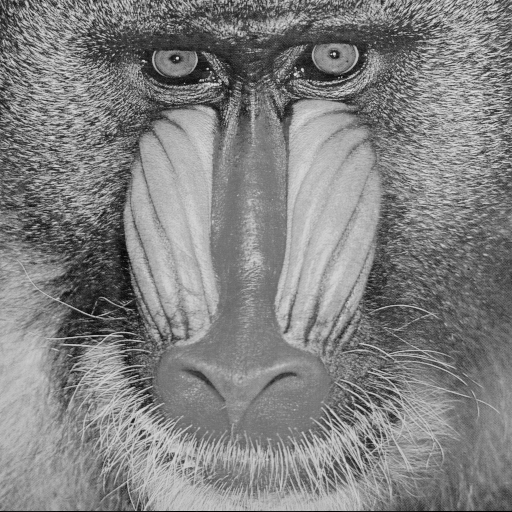

In [11]:
watermark.image

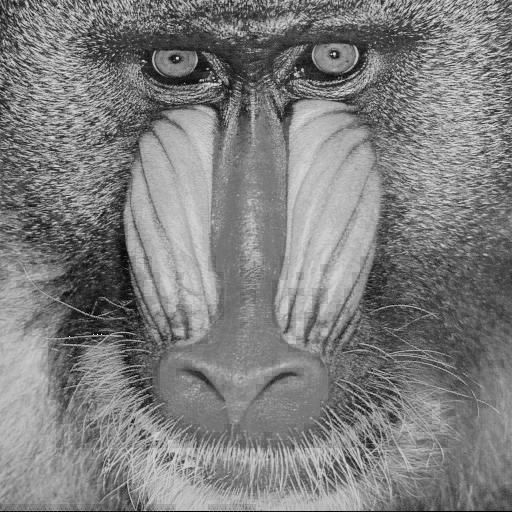

In [12]:
watermark.watermark

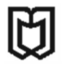

In [13]:
watermark.embedded_image

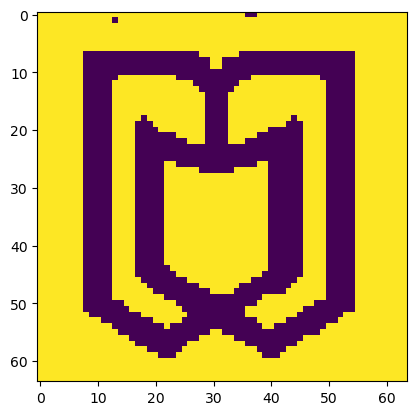

In [14]:
from matplotlib import pyplot as plt
plt.imshow(watermark.result)
plt.show()

In [15]:
bool(watermark.watermark == watermark.image)

False